In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_dir = "../data/"

In [7]:
df = pd.read_csv(data_dir+"books_details.csv")

In [20]:
print("--- Informações Iniciais do DataFrame ---")
df.info()


--- Informações Iniciais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titulo           1000 non-null   object 
 1   preço            1000 non-null   float64
 2   rating           1000 non-null   float64
 3   disponibilidade  1000 non-null   int64  
 4   categoria        1000 non-null   object 
 5   imagem           1000 non-null   object 
 6   url_livro        1000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [18]:
print("\n--- Primeiras Linhas ---")
df.head()



--- Primeiras Linhas ---


,titulo,preço,rating,disponibilidade,categoria,imagem,url_livro
0,A Light in the Attic,51.77,3.0,22,Poetry,https://books.toscrape.com/media/cache/fe/72/f...,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,53.74,1.0,20,Historical Fiction,https://books.toscrape.com/media/cache/08/e9/0...,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,50.10,1.0,20,Fiction,https://books.toscrape.com/media/cache/ee/cf/e...,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,47.82,4.0,20,Mystery,https://books.toscrape.com/media/cache/c0/59/c...,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History of Humankind,54.23,5.0,20,History,https://books.toscrape.com/media/cache/ce/5f/c...,https://books.toscrape.com/catalogue/sapiens-a...


In [17]:
print("\n--- Estatísticas Descritivas (Numéricas) ---")
df.describe().T



--- Estatísticas Descritivas (Numéricas) ---


,count,mean,std,min,25%,50%,75%,max
preço,1000.0,35.07035,14.446690,10.0,22.1075,35.98,47.4575,59.99
rating,1000.0,2.92300,1.434967,1.0,2.0000,3.00,4.0000,5.00
disponibilidade,1000.0,8.58500,5.654622,1.0,3.0000,7.00,14.0000,22.00


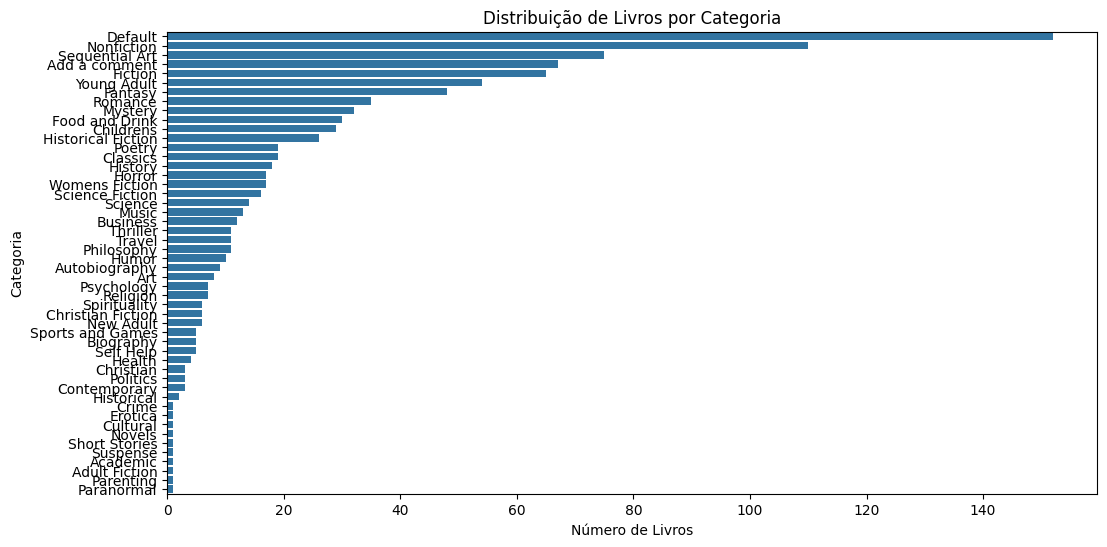

In [21]:
# Contagem de Livros por Categoria
plt.figure(figsize=(12, 6))
sns.countplot(y='categoria', data=df, order=df['categoria'].value_counts().index)
plt.title('Distribuição de Livros por Categoria')
plt.xlabel('Número de Livros')
plt.ylabel('Categoria')
plt.show()

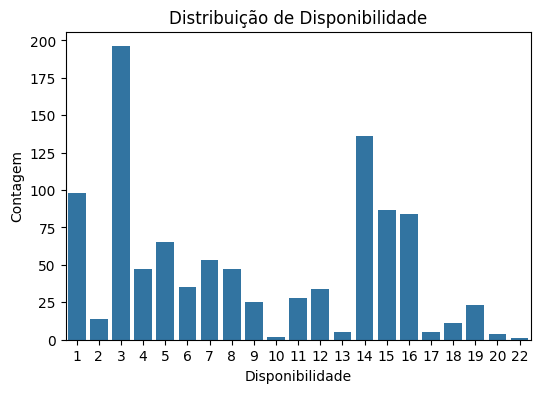

In [22]:
# Contagem de Disponibilidade
plt.figure(figsize=(6, 4))
sns.countplot(x='disponibilidade', data=df)
plt.title('Distribuição de Disponibilidade')
plt.xlabel('Disponibilidade')
plt.ylabel('Contagem')
plt.show()

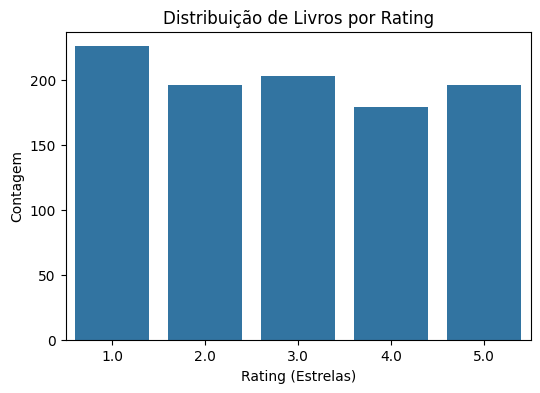

In [23]:
# Contagem de Ratings (Avaliações)
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, order=sorted(df['rating'].unique()))
plt.title('Distribuição de Livros por Rating')
plt.xlabel('Rating (Estrelas)')
plt.ylabel('Contagem')
plt.show()

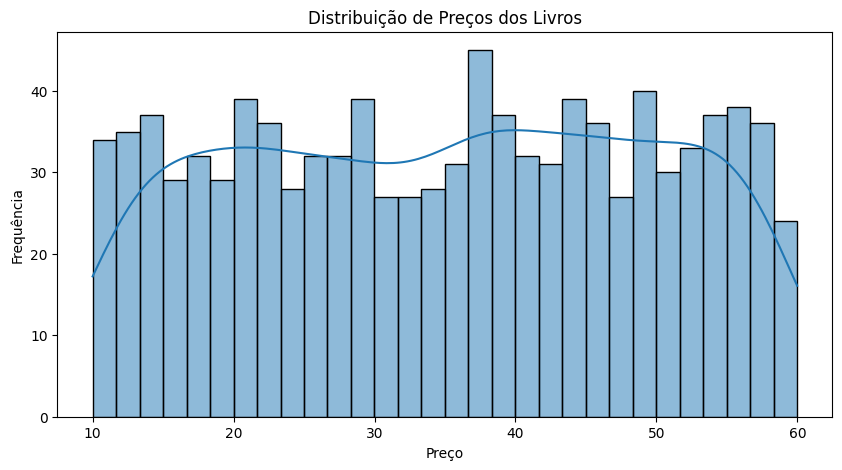

In [24]:
# Distribuição do Preço
plt.figure(figsize=(10, 5))
sns.histplot(df['preço'], bins=30, kde=True)
plt.title('Distribuição de Preços dos Livros')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()


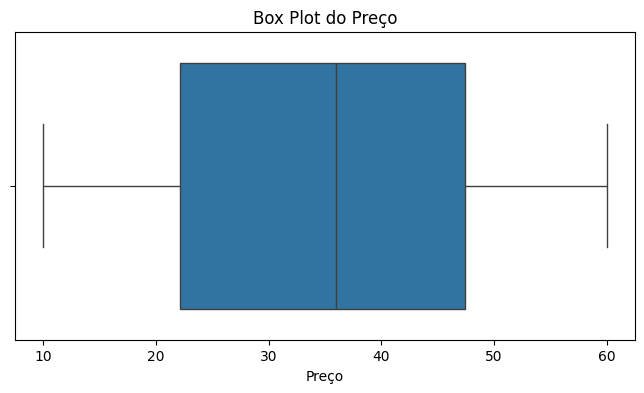

In [25]:
# Box Plot para identificar outliers no Preço
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['preço'])
plt.title('Box Plot do Preço')
plt.xlabel('Preço')
plt.show()

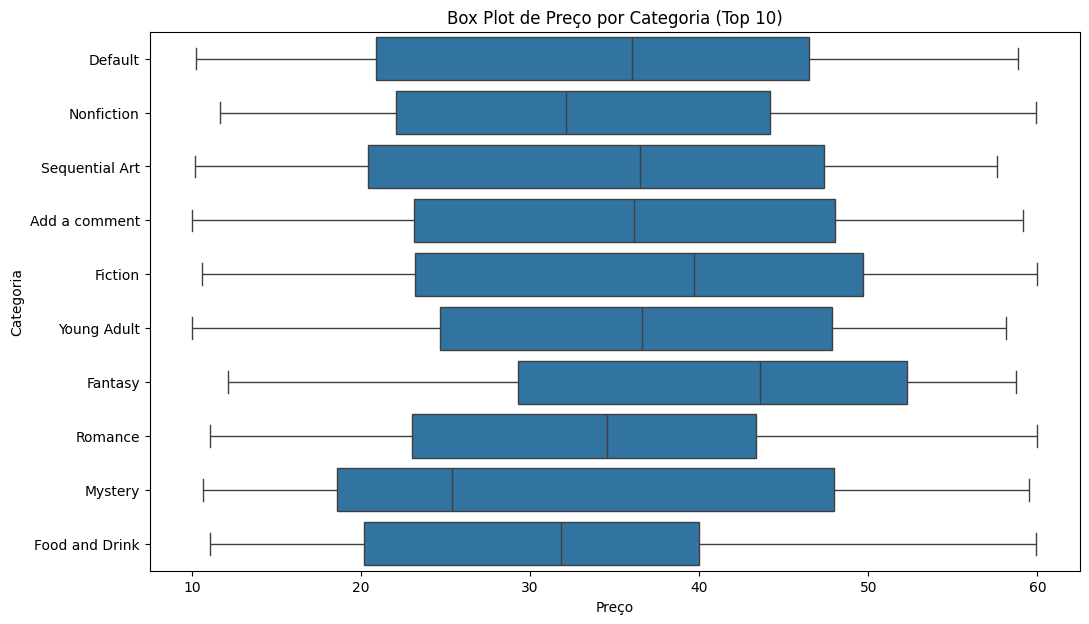

In [27]:
# Box Plot de Preço por Categoria
# Isso ajuda a ver se certas categorias tendem a ser mais caras
top_10_categorias = df['categoria'].value_counts().head(10).index # Pegando as 10 mais populares
df_top = df[df['categoria'].isin(top_10_categorias)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='preço', y='categoria', data=df_top, order=top_10_categorias)
plt.title('Box Plot de Preço por Categoria (Top 10)')
plt.xlabel('Preço')
plt.ylabel('Categoria')
plt.show()